In [1]:
%pip install pandas numpy scikit-learn matplotlib openpyxl pyarrow "dask[complete]" seaborn imblearn
%pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu

Note: you may need to restart the kernel to use updated packages.
Looking in indexes: https://download.pytorch.org/whl/cpu
Note: you may need to restart the kernel to use updated packages.


In [2]:
import gc
gc.collect()

31

In [3]:
import pandas as pd
import numpy as np
BASE_PATH = 'temp/'
MANUAL_BEST_COLUMNS_CORR = [
    "VALUE_median_590500_Nm",
    "VALUE_mean_590500_Nm",
    "VALUE_min_590500_Nm",
    "VALUE_max_590500_Nm",
    "VALUE_min_SECTION_ZP8_00000001_V",
    "VALUE_mean_316800_Grad",
    "VALUE_median_316800_Grad",
    "VALUE_min_316800_Grad",
    "VALUE_max_316800_Grad",
    "VALUE_median_131000_Grad",
    "VALUE_mean_042000_Nm",
    "VALUE_median_042000_Nm",
    "VALUE_max_140100_Grad",
    "VALUE_min_042000_Nm",
    "VALUE_mean_140100_Grad",
    "VALUE_mean_427300_Grad",
    "VALUE_max_427300_Grad",
    "VALUE_median_140100_Grad",
    "VALUE_median_SECTION_ZP8_00000001_V",
    "VALUE_median_427300_Grad",
    "VALUE_max_042000_Nm",
    "VALUE_mean_650300_Nm",
    "VALUE_median_650300_Nm",
    "VALUE_max_650300_Nm",
    "VALUE_mean_580300_Grad",
    "VALUE_median_792000_Nm",
    "VALUE_median_214600_Nm",
    "VALUE_mean_214600_Grad",
    "VALUE_mean_427400_Grad",
    "VALUE_mean_SECTION_ZP8_00000001_V"
]


In [4]:

files = ['RESULTADOS_04_06_2024.xlsx', 'RESULTADOS_02_03_2024.xlsx']
RESULTS_HEADER = ['KNR', 'NAME', 'ID', 'STATUS', 'UNIT', 'VALUE_ID', 'VALUE', 'DATA']

def read_excel_sheets(file_path):
    excel_data = pd.ExcelFile(f'{BASE_PATH}{file_path}')
    df_list = []
    for sheet in excel_data.sheet_names:
        print(f'Processing sheet {sheet}')
        df = pd.read_excel(excel_data, sheet_name=sheet, header=0)
        df = df.iloc[2:, 1:]
        df.columns = RESULTS_HEADER
        df_list.append(df)
        print(f'Processed {df.shape[0]} rows')
    print(f'Processed {len(df_list)} sheets')
    return pd.concat(df_list, ignore_index=True)

for file in files:
    print(f'Processing {file}')
    data = read_excel_sheets(file)
    data = data[RESULTS_HEADER]
    print(f'Saving {file}')
    data.to_csv(f'{BASE_PATH}{file}.csv', index=False)

Processing RESULTADOS_04_06_2024.xlsx


FileNotFoundError: [Errno 2] No such file or directory: 'temp/RESULTADOS_04_06_2024.xlsx'

In [9]:
csv_file = 'RESULTS.csv'
csv_from_excel = [pd.read_csv(f'{BASE_PATH}{file}.csv') for file in files]

for i, df in enumerate(csv_from_excel):
    print(f'Processing file {files[i]}')
    df.to_csv(f'{BASE_PATH}{csv_file}', mode='a', header=False, index=False)


FileNotFoundError: [Errno 2] No such file or directory: 'temp/RESULTADOS_04_06_2024.xlsx.csv'

In [3]:
FAILURES_FILEPATH = 'temp/FAILURES.csv'

failures_df = pd.read_csv(FAILURES_FILEPATH, engine="pyarrow")

RESULTS_HEADER = ['KNR', 'NAME', 'ID', 'STATUS', 'UNIT', 'VALUE_ID', 'VALUE', 'DATA']
RESULTS_FILEPATH = 'temp/RESULTS.csv'

results_df = pd.read_csv(RESULTS_FILEPATH, engine="pyarrow")

In [11]:
failures_df

,KNR,MODELO,HALLE,FALHA
10,2023-4150504,AUDI Q3,ROD,Iluminação central interna (09) Ruído de corpo...
21,2023-4210026,AUDI Q3,ROD,Painel instrumentos Ruído (-)
30,2023-4240490,AUDI Q3,ROD,Painel instrumentos Ruído (-)
60,2023-4330463,AUDI Q3,ROD,Mangueira do compressor (Alta pressão) Parafus...
64,2023-4510234,AUDI Q3,ROD,Revestimento coluna B Ruído de peça solta
...,...,...,...,...
1737513,2024-2536479,T-CROSS,ROD,Retrovisor - Espelho retrovisor interno Ruído (-)
1739286,2024-2546246,T-CROSS,ROD,Chapa do assoalho (Underbody) Ruído de corpo e...
1739948,2024-2546334,T-CROSS,ROD,Retrovisor - Espelho retrovisor interno Ruído (-)
1740902,2024-2546448,T-CROSS,ROD,Tampa do porta-luvas Ruído (-)


In [4]:
results_df

,KNR,NAME,ID,STATUS,UNIT,VALUE_ID,VALUE,DATA
0,2023-2056234,012001,1,10,None,None,None,2024-05-16 13:41:25
1,2023-2056234,012002,1,10,None,None,None,2024-05-16 14:12:35
2,2023-2056234,012003,1,10,None,None,None,2024-05-16 14:12:27
3,2023-2056234,012004,1,10,None,None,None,2024-05-16 14:11:07
4,2023-2056234,012008,1,10,None,None,None,2024-05-16 14:13:07
...,...,...,...,...,...,...,...,...
110900983,2024-2016184,720100,2,10,Nm,2.0,10.06 ...,2024-03-21 17:48:53
110900984,2024-2016184,720200,2,10,Grad,1.0,21 ...,2024-03-21 17:48:53
110900985,2024-2016184,720200,2,10,Grad,3.0,27.8 ...,2024-03-21 17:48:53
110900986,2024-2016184,720200,2,10,Nm,0.0,10.02 ...,2024-03-21 17:48:53


In [4]:
# Remove colunas desnecessárias se existirem
failures_df = failures_df.drop(columns=['DATA', 'ESTACAO', "STATUS", "USUARIO", "COR", "MOTOR"], errors='ignore')
results_df = results_df.drop(columns=['DATA', 'VALUE_ID'], errors='ignore')

In [5]:
# Filtrar as falhas para a estação HALLE ROD
failures_df = failures_df[failures_df['HALLE'] == 'ROD']

In [7]:
failures_df

,KNR,MODELO,HALLE,FALHA
10,2023-4150504,AUDI Q3,ROD,Iluminação central interna (09) Ruído de corpo...
21,2023-4210026,AUDI Q3,ROD,Painel instrumentos Ruído (-)
30,2023-4240490,AUDI Q3,ROD,Painel instrumentos Ruído (-)
60,2023-4330463,AUDI Q3,ROD,Mangueira do compressor (Alta pressão) Parafus...
64,2023-4510234,AUDI Q3,ROD,Revestimento coluna B Ruído de peça solta
...,...,...,...,...
1737513,2024-2536479,T-CROSS,ROD,Retrovisor - Espelho retrovisor interno Ruído (-)
1739286,2024-2546246,T-CROSS,ROD,Chapa do assoalho (Underbody) Ruído de corpo e...
1739948,2024-2546334,T-CROSS,ROD,Retrovisor - Espelho retrovisor interno Ruído (-)
1740902,2024-2546448,T-CROSS,ROD,Tampa do porta-luvas Ruído (-)


In [8]:
results_df

,KNR,NAME,ID,STATUS,UNIT,VALUE
0,2023-2056234,012001,1,10,None,None
1,2023-2056234,012002,1,10,None,None
2,2023-2056234,012003,1,10,None,None
3,2023-2056234,012004,1,10,None,None
4,2023-2056234,012008,1,10,None,None
...,...,...,...,...,...,...
110900983,2024-2016184,720100,2,10,Nm,10.06 ...
110900984,2024-2016184,720200,2,10,Grad,21 ...
110900985,2024-2016184,720200,2,10,Grad,27.8 ...
110900986,2024-2016184,720200,2,10,Nm,10.02 ...


In [9]:
# Verifica a quantidade de KNR de falhas que estão no arquivo de resultados
results_df[(results_df['KNR'].isin(failures_df['KNR'].unique())) & (results_df['STATUS'] == 13)]['KNR'].nunique()

3794

In [7]:
# Quantidade de valores de NAME para KNR
results_df.groupby(['KNR', 'NAME']).size().reset_index(name='count')

This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.


,KNR,NAME,count
0,2023-2016173,272500,4
1,2023-2016173,580300,8
2,2023-2016173,SECTION_ZP8_00000001,2
3,2023-2026098,272500,2
4,2023-2026098,580300,6
...,...,...,...
18475798,2024-2976013,423500,4
18475799,2024-2976013,423600,4
18475800,2024-2976013,423700,4
18475801,2024-2976013,720100,8


In [17]:
results_df

,KNR,NAME,ID,STATUS,UNIT,VALUE
0,2023-2056234,012001,1,10,None,None
1,2023-2056234,012002,1,10,None,None
2,2023-2056234,012003,1,10,None,None
3,2023-2056234,012004,1,10,None,None
4,2023-2056234,012008,1,10,None,None
...,...,...,...,...,...,...
110900983,2024-2016184,720100,2,10,Nm,10.06 ...
110900984,2024-2016184,720200,2,10,Grad,21 ...
110900985,2024-2016184,720200,2,10,Grad,27.8 ...
110900986,2024-2016184,720200,2,10,Nm,10.02 ...


In [6]:
# Otimizar os tipos de dados
results_df['ID'] = pd.to_numeric(results_df['ID'], downcast='integer')
results_df['STATUS'] = pd.to_numeric(results_df['STATUS'], downcast='integer')
results_df["VALUE"] = pd.to_numeric(results_df["VALUE"], errors='coerce')

In [7]:
# Remove as linhas com valores nulos
results_df = results_df.dropna()

In [8]:
# Remove HALLE do failures_df
failures_df = failures_df.drop(columns=['HALLE'], errors='ignore')

# Filtra por MODELO apenas T-CROSS
failures_df = failures_df[failures_df['MODELO'] == 'T-CROSS']

In [9]:
# Agrupa as FALHA do failures_df por KNR e transforma em uma lista
failures_df = failures_df.groupby('KNR')['FALHA'].apply(list).reset_index().rename(columns={'FALHA': 'FALHAS'})

# Mostra a quantidade minimas e máximas de falhas
failures_df['FALHAS'].apply(len).min(), failures_df['FALHAS'].apply(len).max()

(np.int64(1), np.int64(8))

In [10]:
# Coloca de forma binária se a falha existe ou não para cada KNR no results_df com base no failures_df
results_df = results_df.merge(failures_df, on='KNR', how='left')
results_df['HAS_FAILURE'] = (~results_df['FALHAS'].isnull()).astype(int)
results_df = results_df.drop(columns=['FALHAS'], errors='ignore')

In [11]:
# Limpa os espaços em branco
results_df['UNIT'] = results_df['UNIT'].str.strip()

# Renomeia os valores de UNIT
results_df['UNIT'] = results_df['UNIT'].replace(r'\\u00B0', 'Degree', regex=True)
results_df['UNIT'] = results_df['UNIT'].replace('', 'Unknown')
results_df['UNIT'] = results_df['UNIT'].replace('%', 'Percentage')

In [ ]:
results_df["UNIT"].unique()

In [12]:
# Replace to categorical
results_df['STATUS'] = results_df['STATUS'].astype('category')
results_df['ID'] = results_df['ID'].astype('category')

In [13]:
# Usa KNR como index
results_df = results_df.set_index('KNR')

In [14]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103685786 entries, 2023-2056234 to 2024-2016184
Data columns (total 6 columns):
 #   Column       Dtype   
---  ------       -----   
 0   NAME         object  
 1   ID           category
 2   STATUS       category
 3   UNIT         object  
 4   VALUE        object  
 5   HAS_FAILURE  int64   
dtypes: category(2), int64(1), object(3)
memory usage: 4.1+ GB


In [19]:
# Checkpoint 1 parquet
results_df.to_parquet(f'{BASE_PATH}RESULTS_CLEANED_c1.parquet')

In [10]:
# Carrega Checkpoint 1
results_df = pd.read_parquet(f'{BASE_PATH}RESULTS_CLEANED_c1.parquet')

In [2]:
import dask.dataframe as dd

# Carrega o arquivo Parquet como um DataFrame Dask
ddf = dd.read_parquet(f'{BASE_PATH}RESULTS_CLEANED_c1.parquet')
knr_has_failure = ddf.groupby('KNR')['HAS_FAILURE'].max().compute()

# Reseta o índice para garantir que KNR esteja como uma coluna regular
ddf = ddf.reset_index()

# Cria a coluna NAME_UNIT combinando NAME e UNIT
ddf['NAME_UNIT'] = ddf['NAME'] + '_' + ddf['UNIT']

# Realiza a agregação dos dados, calculando min, max, mean, median e std para cada combinação de KNR e NAME_UNIT
aggregated_ddf = ddf.groupby(['KNR', 'NAME_UNIT']).agg({
    'VALUE': ['min', 'max', 'mean', 'median', 'std']
}).compute()  # Aqui o Dask executa a computação e retorna um DataFrame do P andas

# Achata os nomes das colunas do MultiIndex para formar nomes de colunas únicos e legíveis
aggregated_ddf.columns = ['_'.join(col).strip() for col in aggregated_ddf.columns.values]

# Faz o pivot do DataFrame para que cada combinação de NAME_UNIT se torne um conjunto de colunas
pivot_df = aggregated_ddf.unstack(level='NAME_UNIT')

# Achata as colunas novamente após o unstack para garantir que todos os níveis sejam combinados em nomes de colunas únicos
pivot_df.columns = ['_'.join(col).strip() for col in pivot_df.columns.values]

# Reseta o índice para que KNR se torne uma coluna novamente
pivot_df = pivot_df.reset_index()

# Adiciona o HAS_FAILURE de volta ao DataFrame
pivot_df = pivot_df.merge(knr_has_failure, on='KNR', how='left')

pivot_df

,KNR,VALUE_min_042000_Deg,VALUE_min_042000_mm,VALUE_min_042000_Nm,VALUE_min_130100_Grad,VALUE_min_130100_Nm,VALUE_min_130200_Grad,VALUE_min_130200_Nm,VALUE_min_130300_Grad,VALUE_min_130300_Nm,...,VALUE_std_252000_Nm,VALUE_std_311400_Grad,VALUE_std_311400_Nm,VALUE_std_216100_Unknown,VALUE_std_314600_Unknown,VALUE_std_314700_Unknown,VALUE_std_214500_Unknown,VALUE_std_190200_Unknown,VALUE_std_611300_Unknown,HAS_FAILURE
0,2023-2056234,15601.0,1.69,2.93,66.2,30.0,55.0,30.16,78.8,30.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2024-0576004,18491.0,1.81,2.42,67.2,30.1,58.0,30.25,61.7,30.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2024-0576005,18276.0,1.75,3.14,68.5,30.1,53.0,30.20,63.7,30.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,2024-0576006,18240.0,1.85,3.17,61.0,26.1,50.0,30.35,70.1,30.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,2024-0576008,18074.0,1.76,2.81,66.6,30.4,60.0,30.12,61.2,30.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79708,2024-0626320,15290.0,1.56,2.46,49.0,30.3,41.0,30.20,57.7,30.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
79709,2024-0626321,15628.0,1.82,2.25,82.0,30.0,53.0,30.09,55.6,30.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
79710,2024-0626322,15054.0,1.80,2.47,47.1,30.2,50.0,30.25,55.2,30.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
79711,2024-0626323,15329.0,1.80,2.44,65.7,30.0,55.0,30.22,60.7,30.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [4]:
# Remove as colunas com valores nulos
pivot_df = pivot_df.dropna(axis=1, how='all')

In [5]:
pivot_df.shape

(79713, 2575)

In [6]:
# Checkpoint 2 parquet
pivot_df.to_parquet(f'{BASE_PATH}PIVOT_d1.parquet')

In [3]:
# Carrega Checkpoint 2
pivot_df = pd.read_parquet(f'{BASE_PATH}PIVOT_d1.parquet')

In [7]:
# Calcula a porcentagem de valores nulos em cada coluna
null_percentage = pivot_df.isnull().mean() * 100

# Filtra para mostrar apenas colunas com mais de 5% de valores nulos
high_null_percentage = null_percentage[null_percentage > 5]

print(f'Removing columns with more than 5% of missing values, current len: {len(high_null_percentage)}')

# Remove as colunas com mais de 5% de valores nulos
pivot_df = pivot_df.drop(columns=high_null_percentage.index)

Removing columns with more than 5% of missing values, current len: 601


In [8]:
pivot_df.shape

(79713, 1974)

In [9]:
pivot_df["HAS_FAILURE"].value_counts()

HAS_FAILURE
0    74664
1     5049
Name: count, dtype: int64

In [30]:
pivot_df.isnull().sum().sum()

np.int64(3262673)

In [31]:

def fill_nan(df):
    for col in df.columns:
        if '_min' in col:
            # Preencher valores nulos na coluna 'min' com o valor máximo da coluna ou com o percentil 95
            df[col] = df[col].fillna(df[col].quantile(0.95))
        elif '_max' in col:
            # Preencher valores nulos na coluna 'max' com o valor mínimo da coluna ou com o percentil 5
            df[col] = df[col].fillna(df[col].quantile(0.05))
        elif '_mean' in col:
            # Preencher valores nulos na coluna 'mean' com a mediana da coluna

            df[col] = df[col].fillna(df[col].median())
        elif '_median' in col:
            # Preencher valores nulos na coluna 'median' com a mediana da coluna

            df[col] = df[col].fillna(df[col].median())
        elif '_std' in col:
            # Preencher valores nulos na coluna 'std' com 0 ou com a média do std
            df[col] = df[col].fillna(0)

    return df

# Aplicar o preenchimento ao DataFrame
pivot_df_filled = fill_nan(pivot_df)

# Verificar se há valores nulos restantes
pivot_df_filled.isnull().sum().sum()

np.int64(0)

In [33]:
# Checkpoint 3 parquet
pivot_df_filled.to_parquet(f'{BASE_PATH}PIVOT_d2.parquet')

In [7]:
# Carrega Checkpoint 3
pivot_df = pd.read_parquet(f'{BASE_PATH}PIVOT_d2.parquet')

In [5]:
%pip install scikit-learn-intelex
from sklearnex import patch_sklearn
patch_sklearn()

Note: you may need to restart the kernel to use updated packages.


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [ ]:
import dask.dataframe as dd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar o DataFrame Dask
ddf = dd.read_parquet(f'{BASE_PATH}PIVOT_d2.parquet')

# Remover a coluna 'KNR' usando Dask
df_without_knr = ddf.drop(columns=['KNR'])

# Calcular a correlação de cada coluna com HAS_FAILURE
correlations = df_without_knr.corr().compute()['HAS_FAILURE'].abs().sort_values(ascending=False)

# Selecionar as 20 colunas mais correlacionadas
top_20_features = correlations.index[:20]

# Filtrar o DataFrame Dask para essas colunas mais HAS_FAILURE
df_top_20 = df_without_knr[top_20_features].compute()

# Calcular a matriz de correlação das 20 colunas selecionadas
corr_matrix = df_top_20.corr()

# Gerar o mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Calor das 20 Colunas Mais Correlacionadas com HAS_FAILURE (Sem KNR)')
plt.show()


In [35]:
print(pivot_df["HAS_FAILURE"].value_counts())

# limit the number of samples with HAS_FAILURE = 0 to the number of samples with HAS_FAILURE = 1
failure_0 = pivot_df[pivot_df["HAS_FAILURE"] == 0].sample(n=pivot_df["HAS_FAILURE"].value_counts()[1])
failure_1 = pivot_df[pivot_df["HAS_FAILURE"] == 1]

# concatenate the two dataframes
pivot_df = pd.concat([failure_0, failure_1])

HAS_FAILURE
0    74664
1     5049
Name: count, dtype: int64


In [43]:
pivot_df

,KNR,VALUE_min_042000_Nm,VALUE_min_130100_Grad,VALUE_min_130100_Nm,VALUE_min_130200_Grad,VALUE_min_130200_Nm,VALUE_min_130300_Grad,VALUE_min_130300_Nm,VALUE_min_130400_Grad,VALUE_min_130400_Nm,...,VALUE_std_422900_Nm,VALUE_std_423100_Grad,VALUE_std_423100_Nm,VALUE_std_423300_Grad,VALUE_std_423300_Nm,VALUE_std_720100_Grad,VALUE_std_720100_Nm,VALUE_std_720200_Grad,VALUE_std_720200_Nm,HAS_FAILURE
62375,2023-4536376,0.00,56.0,30.1,46.0,30.17,81.7,30.2,0.0,1.11,...,7.891312,31.395541,7.721606,26.162951,6.752870,22.980970,0.014142,18.526198,0.000000,0
58349,2023-4316057,0.78,78.8,30.1,41.0,30.12,70.7,30.0,71.0,30.15,...,7.148443,34.718943,9.305525,0.070711,4.136575,14.919953,0.021213,6.151829,0.007071,0
50108,2023-2316414,0.64,70.7,30.1,65.0,30.13,70.6,30.3,54.0,30.12,...,7.438763,36.345289,5.275017,39.810112,7.254916,18.087565,4.194477,4.242641,0.014142,0
51794,2023-2646296,1.08,43.4,30.0,20.0,30.08,70.1,30.3,76.0,30.17,...,1.060660,42.497118,5.232590,34.648232,0.841457,4.949747,0.021213,4.101219,0.007071,0
47766,2023-3936002,0.61,53.8,30.0,57.0,30.16,82.6,30.1,99.0,30.13,...,8.266078,24.253763,8.478210,33.799704,6.986215,1.979899,0.014142,7.283200,0.021213,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79673,2024-0626281,1.85,64.8,30.1,59.0,30.09,58.4,30.1,68.0,30.16,...,10.125769,30.547013,7.162992,18.314066,7.735748,21.071782,0.007071,4.808326,0.049497,1
79687,2024-0626298,2.49,65.2,30.0,51.0,30.12,59.1,30.2,94.0,30.25,...,8.739840,17.324116,9.432804,26.445794,6.816509,19.021172,0.028284,11.242998,0.014142,1
79688,2024-0626299,1.93,62.0,30.2,62.0,30.02,70.7,30.4,64.0,30.21,...,9.538870,25.031580,7.799388,0.070711,10.528820,1.131371,0.000000,0.353553,0.028284,1
79702,2024-0626314,2.03,74.4,30.1,46.0,30.13,67.5,30.1,78.0,30.18,...,6.929646,31.819805,6.950860,14.283557,6.448814,4.171930,0.028284,5.374012,0.000000,1


In [36]:
print(pivot_df["HAS_FAILURE"].value_counts())

HAS_FAILURE
0    5049
1    5049
Name: count, dtype: int64


Accuracy: 0.5733
Precision: 0.5736
Recall: 0.5710
F1-Score: 0.5723


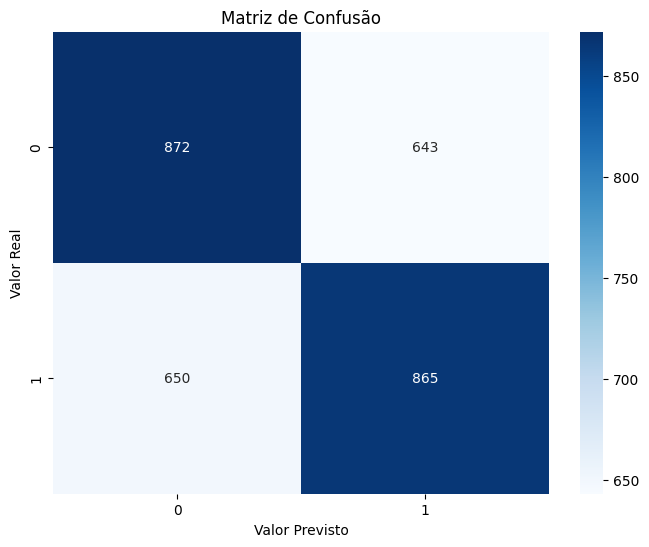

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Seleciona as colunas para features (X) e a coluna alvo (y)
X = pivot_df.drop(columns=['HAS_FAILURE', 'KNR'])  # Remove 'KNR' pq não é uma feature
y = pivot_df['HAS_FAILURE']

# Divide os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Inicializa o modelo de Gradient Boosting
model = GradientBoostingClassifier(random_state=42)

# Treina o modelo
model.fit(X_train, y_train)

# Faz previsões no conjunto de teste para avaliar o modelo
y_pred = model.predict(X_test)

# Desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Exibi a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Matriz de Confusão')
plt.ylabel('Valor Real')
plt.xlabel('Valor Previsto')
plt.show()

Accuracy: 0.5548
Precision: 0.5517
Recall: 0.5842
F1-Score: 0.5675


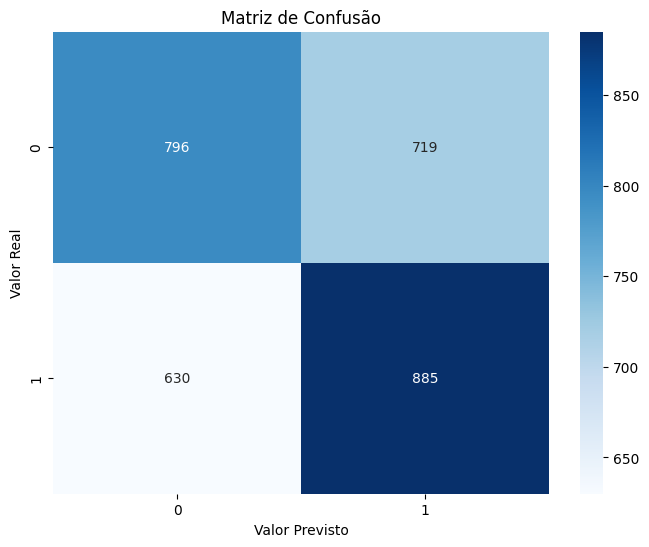

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Seleciona as colunas para features (X) e a coluna alvo (y)
X = pivot_df.drop(columns=['HAS_FAILURE', 'KNR'])  # Remove 'KNR' porque não é uma feature
y = pivot_df['HAS_FAILURE']

# Divide os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Padroniza os dados (SVM é sensível à escala)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Inicializa o modelo de SVM
model = SVC(random_state=42)

# Treina o modelo
model.fit(X_train, y_train)

# Faz previsões no conjunto de teste para avaliar o modelo
y_pred = model.predict(X_test)

# Desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Exibi a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Matriz de Confusão')
plt.ylabel('Valor Real')
plt.xlabel('Valor Previsto')
plt.show()

Epoch [1/100], Loss: 0.6945
Epoch [2/100], Loss: 0.4373
Epoch [3/100], Loss: 0.2036
Epoch [4/100], Loss: 0.0158
Epoch [5/100], Loss: 0.0022
Epoch [6/100], Loss: 0.0254
Epoch [7/100], Loss: 0.0007
Epoch [8/100], Loss: 0.0006
Epoch [9/100], Loss: 0.0003
Epoch [10/100], Loss: 0.0555
Epoch [11/100], Loss: 0.0002
Epoch [12/100], Loss: 0.0003
Epoch [13/100], Loss: 0.0256
Epoch [14/100], Loss: 0.0136
Epoch [15/100], Loss: 0.0076
Epoch [16/100], Loss: 0.0001
Epoch [17/100], Loss: 0.0199
Epoch [18/100], Loss: 0.0001
Epoch [19/100], Loss: 0.0224
Epoch [20/100], Loss: 0.0001
Epoch [21/100], Loss: 0.0001
Epoch [22/100], Loss: 0.0344
Epoch [23/100], Loss: 0.0050
Epoch [24/100], Loss: 0.0448
Epoch [25/100], Loss: 0.0001
Epoch [26/100], Loss: 0.0339
Epoch [27/100], Loss: 0.0290
Epoch [28/100], Loss: 0.0001
Epoch [29/100], Loss: 0.0001
Epoch [30/100], Loss: 0.0001
Epoch [31/100], Loss: 0.0250
Epoch [32/100], Loss: 0.0001
Epoch [33/100], Loss: 0.0001
Epoch [34/100], Loss: 0.0000
Epoch [35/100], Loss: 0

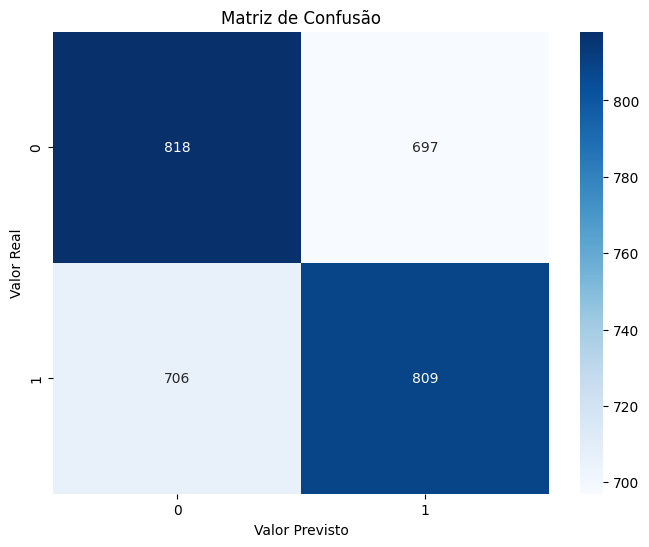

In [41]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preparar os dados
X = pivot_df.drop(columns=['HAS_FAILURE', 'KNR']).values
y = pivot_df['HAS_FAILURE'].values

# Dividir em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Padronizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Converter os dados para tensores PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Criar DataLoader para facilitar o treinamento em batch
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Definir a arquitetura da rede neural recorrente
class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super(RNNModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Inicializar o estado oculto e o estado da célula
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        # Passar pelos LSTM
        out, _ = self.lstm(x, (h0, c0))

        # Pegamos a última saída de LSTM
        out = out[:, -1, :]

        # Passar pela camada fully connected e aplicar sigmoid
        out = self.fc(out)
        out = self.sigmoid(out)
        return out

# Definir o modelo, função de perda e otimizador
input_size = X_train.shape[1]
hidden_size = 64
output_size = 1
num_layers = 2
num_epochs = 100
learning_rate = 0.001

model = RNNModel(input_size, hidden_size, output_size, num_layers)
criterion = nn.BCELoss()  # Como estamos lidando com classificação binária, usamos BCELoss
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Treinar o modelo
model.train()
for epoch in range(num_epochs):
    for i, (features, labels) in enumerate(train_loader):
        # Redimensionar os dados para (batch_size, seq_length, input_size)
        features = features.unsqueeze(1)
        labels = labels.unsqueeze(1)

        # Passar os dados pelo modelo
        outputs = model(features)
        loss = criterion(outputs, labels)

        # Backpropagation e otimização
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Avaliação do modelo
model.eval()
with torch.no_grad():
    X_test_tensor = X_test_tensor.unsqueeze(1)  # Adiciona uma dimensão para o batch
    y_pred_probs = model(X_test_tensor)
    y_pred = (y_pred_probs > 0.5).float()

    accuracy = accuracy_score(y_test_tensor, y_pred)
    precision = precision_score(y_test_tensor, y_pred)
    recall = recall_score(y_test_tensor, y_pred)
    f1 = f1_score(y_test_tensor, y_pred)
    conf_matrix = confusion_matrix(y_test_tensor, y_pred)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    # Exibi a matriz de confusão
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title('Matriz de Confusão')
    plt.ylabel('Valor Real')
    plt.xlabel('Valor Previsto')
    plt.show()

Accuracy: 0.6133
Precision: 0.0761
Recall: 0.4581
F1-Score: 0.1305


/home/ec-03/Documentos/jupyter-lab/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


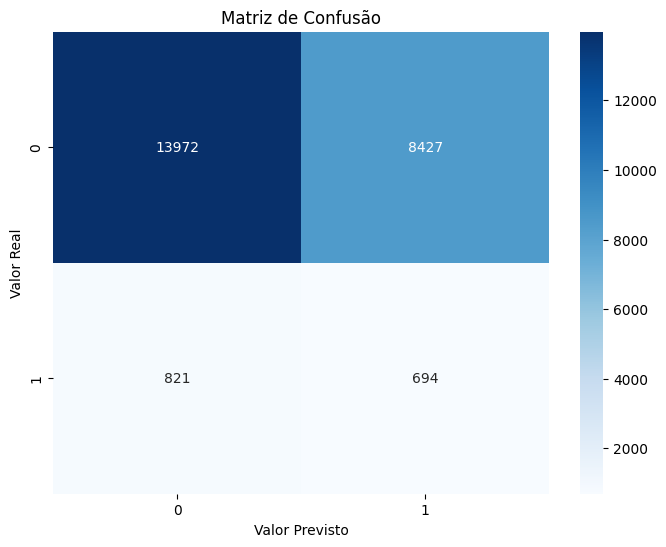

Coeficientes das Features: [[-0.0124071  -0.07072654  0.06574501 ... -0.00928166  0.14388659
   0.01942411]]


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preparar os dados
X = pivot_df.drop(columns=['HAS_FAILURE', 'KNR']).values
y = pivot_df['HAS_FAILURE'].values

# Dividir em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Padronizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Treinar o modelo Logistic Regression com L1 regularization e ajuste de class_weight
logreg = LogisticRegression(penalty='l1', solver='saga', class_weight='balanced', random_state=42, max_iter=1000)
logreg.fit(X_train, y_train)

# Prever no conjunto de teste
y_pred = logreg.predict(X_test)

# Avaliar o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Exibir a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Matriz de Confusão')
plt.ylabel('Valor Real')
plt.xlabel('Valor Previsto')
plt.show()

# Analisar a importância das features
coef = logreg.coef_
print("Coeficientes das Features:", coef)

Threshold: 0.50
Accuracy: 0.6519
Precision: 0.0756
Recall: 0.4007
F1-Score: 0.1273


/home/ec-03/Documentos/jupyter-lab/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


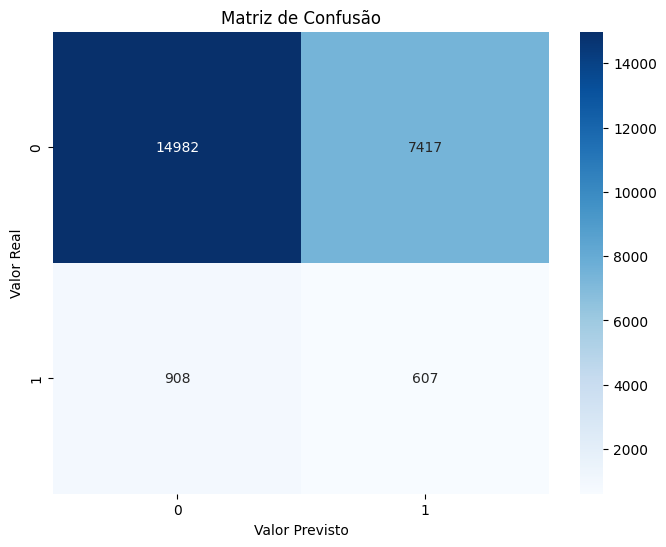

Coeficientes das Features: [-0.1359211  -0.04624836  0.17346387 ... -0.08603824  0.21097903
  0.02330665]
Threshold: 0.10 -> Precision: 0.0650, Recall: 0.9149, F1-Score: 0.1214
Threshold: 0.20 -> Precision: 0.0670, Recall: 0.7974, F1-Score: 0.1237
Threshold: 0.30 -> Precision: 0.0688, Recall: 0.6614, F1-Score: 0.1246
Threshold: 0.40 -> Precision: 0.0717, Recall: 0.5281, F1-Score: 0.1263
Threshold: 0.50 -> Precision: 0.0756, Recall: 0.4007, F1-Score: 0.1273
Threshold: 0.60 -> Precision: 0.0758, Recall: 0.2568, F1-Score: 0.1170
Threshold: 0.70 -> Precision: 0.0798, Recall: 0.1406, F1-Score: 0.1018
Threshold: 0.80 -> Precision: 0.0808, Recall: 0.0568, F1-Score: 0.0667


In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE

# Supondo que pivot_df seja o DataFrame que inclui a coluna HAS_FAILURE e as features relevantes
X = pivot_df.drop(columns=['HAS_FAILURE', 'KNR']).values
y = pivot_df['HAS_FAILURE'].values

# Dividir em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Padronizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Aplicar SMOTE para balancear as classes no conjunto de treino
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Treinar o modelo Logistic Regression com L1 regularization e ajuste de class_weight
logreg = LogisticRegression(penalty='l1', solver='saga', class_weight='balanced', random_state=42, max_iter=1000)
logreg.fit(X_train_res, y_train_res)

# Prever no conjunto de teste
y_pred_probs = logreg.predict_proba(X_test)[:, 1]

# Ajuste do threshold para maximizar a precisão e o recall
threshold = 0.5  # Você pode ajustar esse valor
y_pred_class = (y_pred_probs >= threshold).astype(int)

# Avaliar o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred_class)
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)
conf_matrix = confusion_matrix(y_test, y_pred_class)

print(f"Threshold: {threshold:.2f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Exibir a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Matriz de Confusão')
plt.ylabel('Valor Real')
plt.xlabel('Valor Previsto')
plt.show()

# Analisar a importância das features
coef = logreg.coef_[0]
print("Coeficientes das Features:", coef)

# Opcional: Testar diferentes thresholds
thresholds = np.arange(0.1, 0.9, 0.1)
for threshold in thresholds:
    y_pred_class = (y_pred_probs >= threshold).astype(int)
    precision = precision_score(y_test, y_pred_class)
    recall = recall_score(y_test, y_pred_class)
    f1 = f1_score(y_test, y_pred_class)
    print(f"Threshold: {threshold:.2f} -> Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")

In [51]:
import numpy as np
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType
from sklearn.ensemble import GradientBoostingClassifier

# Supondo que clf seja o seu modelo GradientBoostingClassifier já treinado
clf = model  # Modelo já treinado (GradientBoostingClassifier)

# Definir o tipo de entrada baseado no número de features no X_train
initial_type = [('float_input', FloatTensorType([None, X_train.shape[1]]))]

# Converter o modelo para o formato ONNX
onx = convert_sklearn(clf, initial_types=initial_type)

# Salvar o modelo ONNX em um arquivo
with open(f'./model.onnx', "wb") as f:
    f.write(onx.SerializeToString())

In [47]:
pivot_df

,KNR,VALUE_min_042000_Nm,VALUE_min_130100_Grad,VALUE_min_130100_Nm,VALUE_min_130200_Grad,VALUE_min_130200_Nm,VALUE_min_130300_Grad,VALUE_min_130300_Nm,VALUE_min_130400_Grad,VALUE_min_130400_Nm,...,VALUE_std_422900_Nm,VALUE_std_423100_Grad,VALUE_std_423100_Nm,VALUE_std_423300_Grad,VALUE_std_423300_Nm,VALUE_std_720100_Grad,VALUE_std_720100_Nm,VALUE_std_720200_Grad,VALUE_std_720200_Nm,HAS_FAILURE
62375,2023-4536376,0.00,56.0,30.1,46.0,30.17,81.7,30.2,0.0,1.11,...,7.891312,31.395541,7.721606,26.162951,6.752870,22.980970,0.014142,18.526198,0.000000,0
58349,2023-4316057,0.78,78.8,30.1,41.0,30.12,70.7,30.0,71.0,30.15,...,7.148443,34.718943,9.305525,0.070711,4.136575,14.919953,0.021213,6.151829,0.007071,0
50108,2023-2316414,0.64,70.7,30.1,65.0,30.13,70.6,30.3,54.0,30.12,...,7.438763,36.345289,5.275017,39.810112,7.254916,18.087565,4.194477,4.242641,0.014142,0
51794,2023-2646296,1.08,43.4,30.0,20.0,30.08,70.1,30.3,76.0,30.17,...,1.060660,42.497118,5.232590,34.648232,0.841457,4.949747,0.021213,4.101219,0.007071,0
47766,2023-3936002,0.61,53.8,30.0,57.0,30.16,82.6,30.1,99.0,30.13,...,8.266078,24.253763,8.478210,33.799704,6.986215,1.979899,0.014142,7.283200,0.021213,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79673,2024-0626281,1.85,64.8,30.1,59.0,30.09,58.4,30.1,68.0,30.16,...,10.125769,30.547013,7.162992,18.314066,7.735748,21.071782,0.007071,4.808326,0.049497,1
79687,2024-0626298,2.49,65.2,30.0,51.0,30.12,59.1,30.2,94.0,30.25,...,8.739840,17.324116,9.432804,26.445794,6.816509,19.021172,0.028284,11.242998,0.014142,1
79688,2024-0626299,1.93,62.0,30.2,62.0,30.02,70.7,30.4,64.0,30.21,...,9.538870,25.031580,7.799388,0.070711,10.528820,1.131371,0.000000,0.353553,0.028284,1
79702,2024-0626314,2.03,74.4,30.1,46.0,30.13,67.5,30.1,78.0,30.18,...,6.929646,31.819805,6.950860,14.283557,6.448814,4.171930,0.028284,5.374012,0.000000,1


Gráficos